In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

volatile acidity :   Volatile acidity is the gaseous acids present in wine.
fixed acidity :   Primary fixed acids found in wine are tartaric, succinic, citric, and malic
residual sugar :   Amount of sugar left after fermentation.
citric acid :    It is weak organic acid, found in citrus fruits naturally.
chlorides :   Amount of salt present in wine.
free sulfur dioxide :   So2 is used for prevention of wine by oxidation and microbial spoilage.
pH :   In wine pH is used for checking acidity
sulphates :    Added sulfites preserve freshness and protect wine from oxidation, and bacteria.
alcohol :   Percent of alcohol present in wine.

This date set contains 1599 columns and 12 rows

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The dataset contains two data types(float64,int64)

<Axes: >

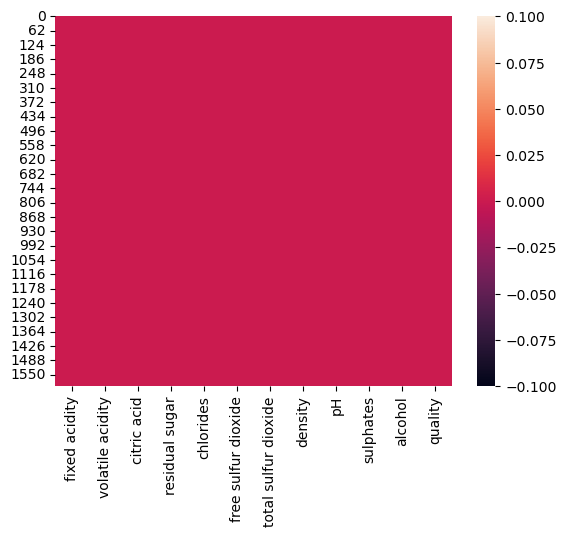

In [9]:
sns.heatmap(df.isnull())

we can clearly visualize that there is no missing values

In [10]:
#checking for value counts
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64


volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64


citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64


residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64


chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64


free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12

In [11]:
df.duplicated().sum()

240

In [12]:
df.drop_duplicates(inplace=True)
df.shape

(1359, 12)

In [13]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

There is no categorical feature present except 'quality' which contains 6 diff categories
So there are total 6 diffeerent qualities of wine

In [14]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [15]:
#statestical summery of numerical data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


1.This gives the statistical summary of numerical columns.The summary of the dataset looks perfect since there is no negative or invalid values are present.
2.In this dataset count of all columns are same,which means there is no missing values are present.
3.The median(50%) is greater than mean which means skewness is preset
4.By summarizing the data there is huge diff between 75% and max Which means outliers are present.


In [16]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.171231,0.578596,0.244523,2.509532,0.093971,17.161179,57.406412,0.997082,3.300815,0.623570,9.888562
6,8.337383,0.496084,0.279364,2.457290,0.085075,15.637383,40.816822,0.996565,3.318000,0.674542,10.658879
7,8.858683,0.403653,0.371856,2.716766,0.076832,13.994012,35.449102,0.996051,3.290060,0.742635,11.491118
8,8.441176,0.427647,0.382941,2.576471,0.068353,13.764706,34.470588,0.995095,3.274118,0.774706,12.158824


# Univariate analysis

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64


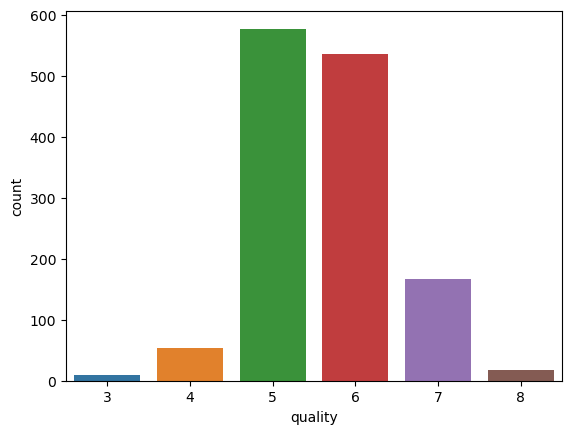

In [17]:
ax=sns.countplot(x='quality',data=df)
print(df['quality'].value_counts())

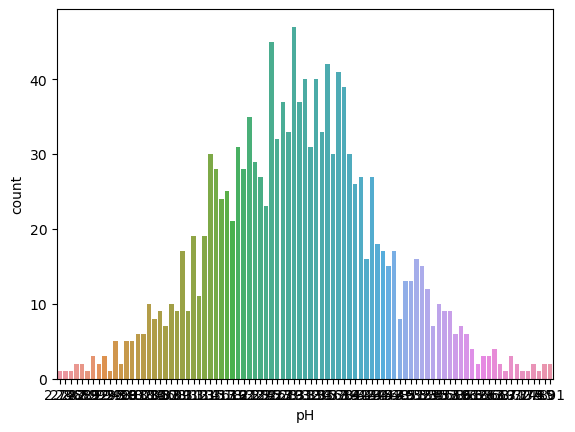

In [18]:
ax=sns.countplot(x='pH',data=df)


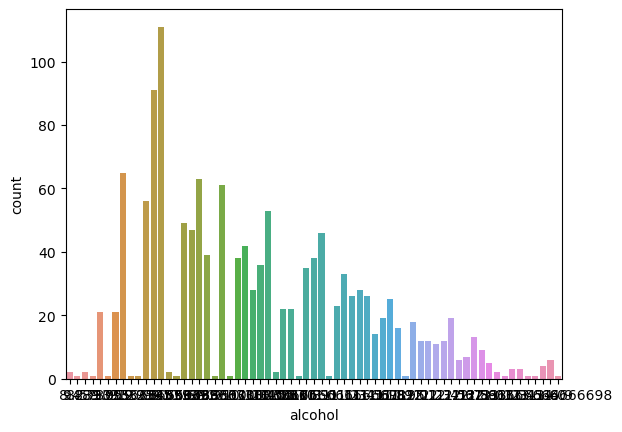

In [19]:
ax=sns.countplot(x='alcohol',data=df)


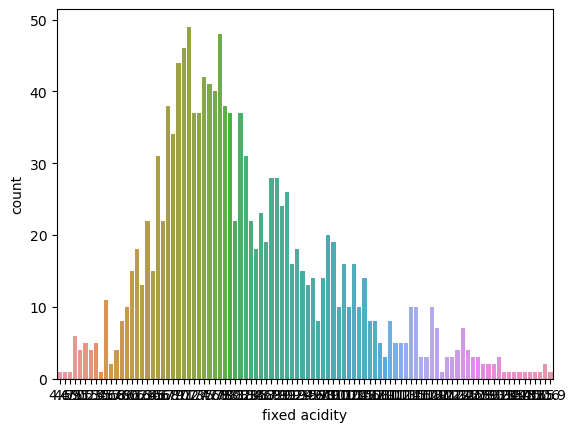

In [20]:
ax=sns.countplot(x='fixed acidity',data=df)


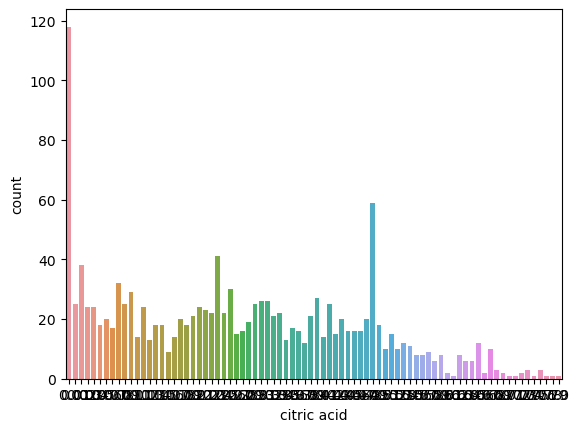

In [21]:
ax=sns.countplot(x='citric acid',data=df)


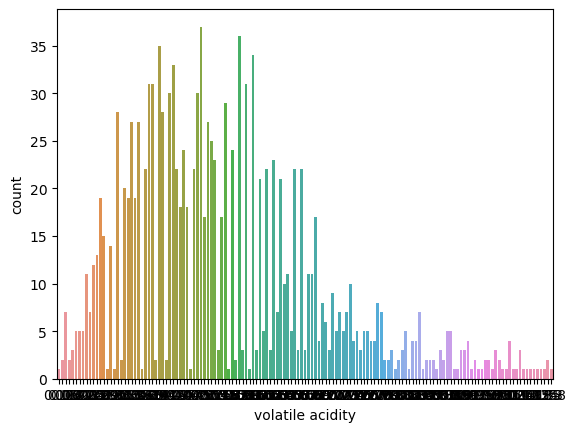

In [22]:
ax=sns.countplot(x='volatile acidity',data=df)


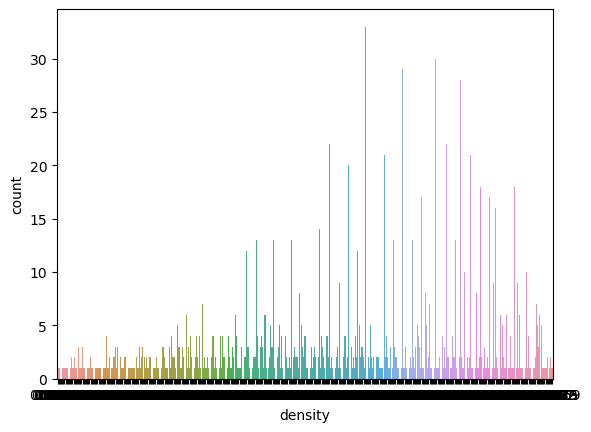

In [23]:
ax=sns.countplot(x='density',data=df)


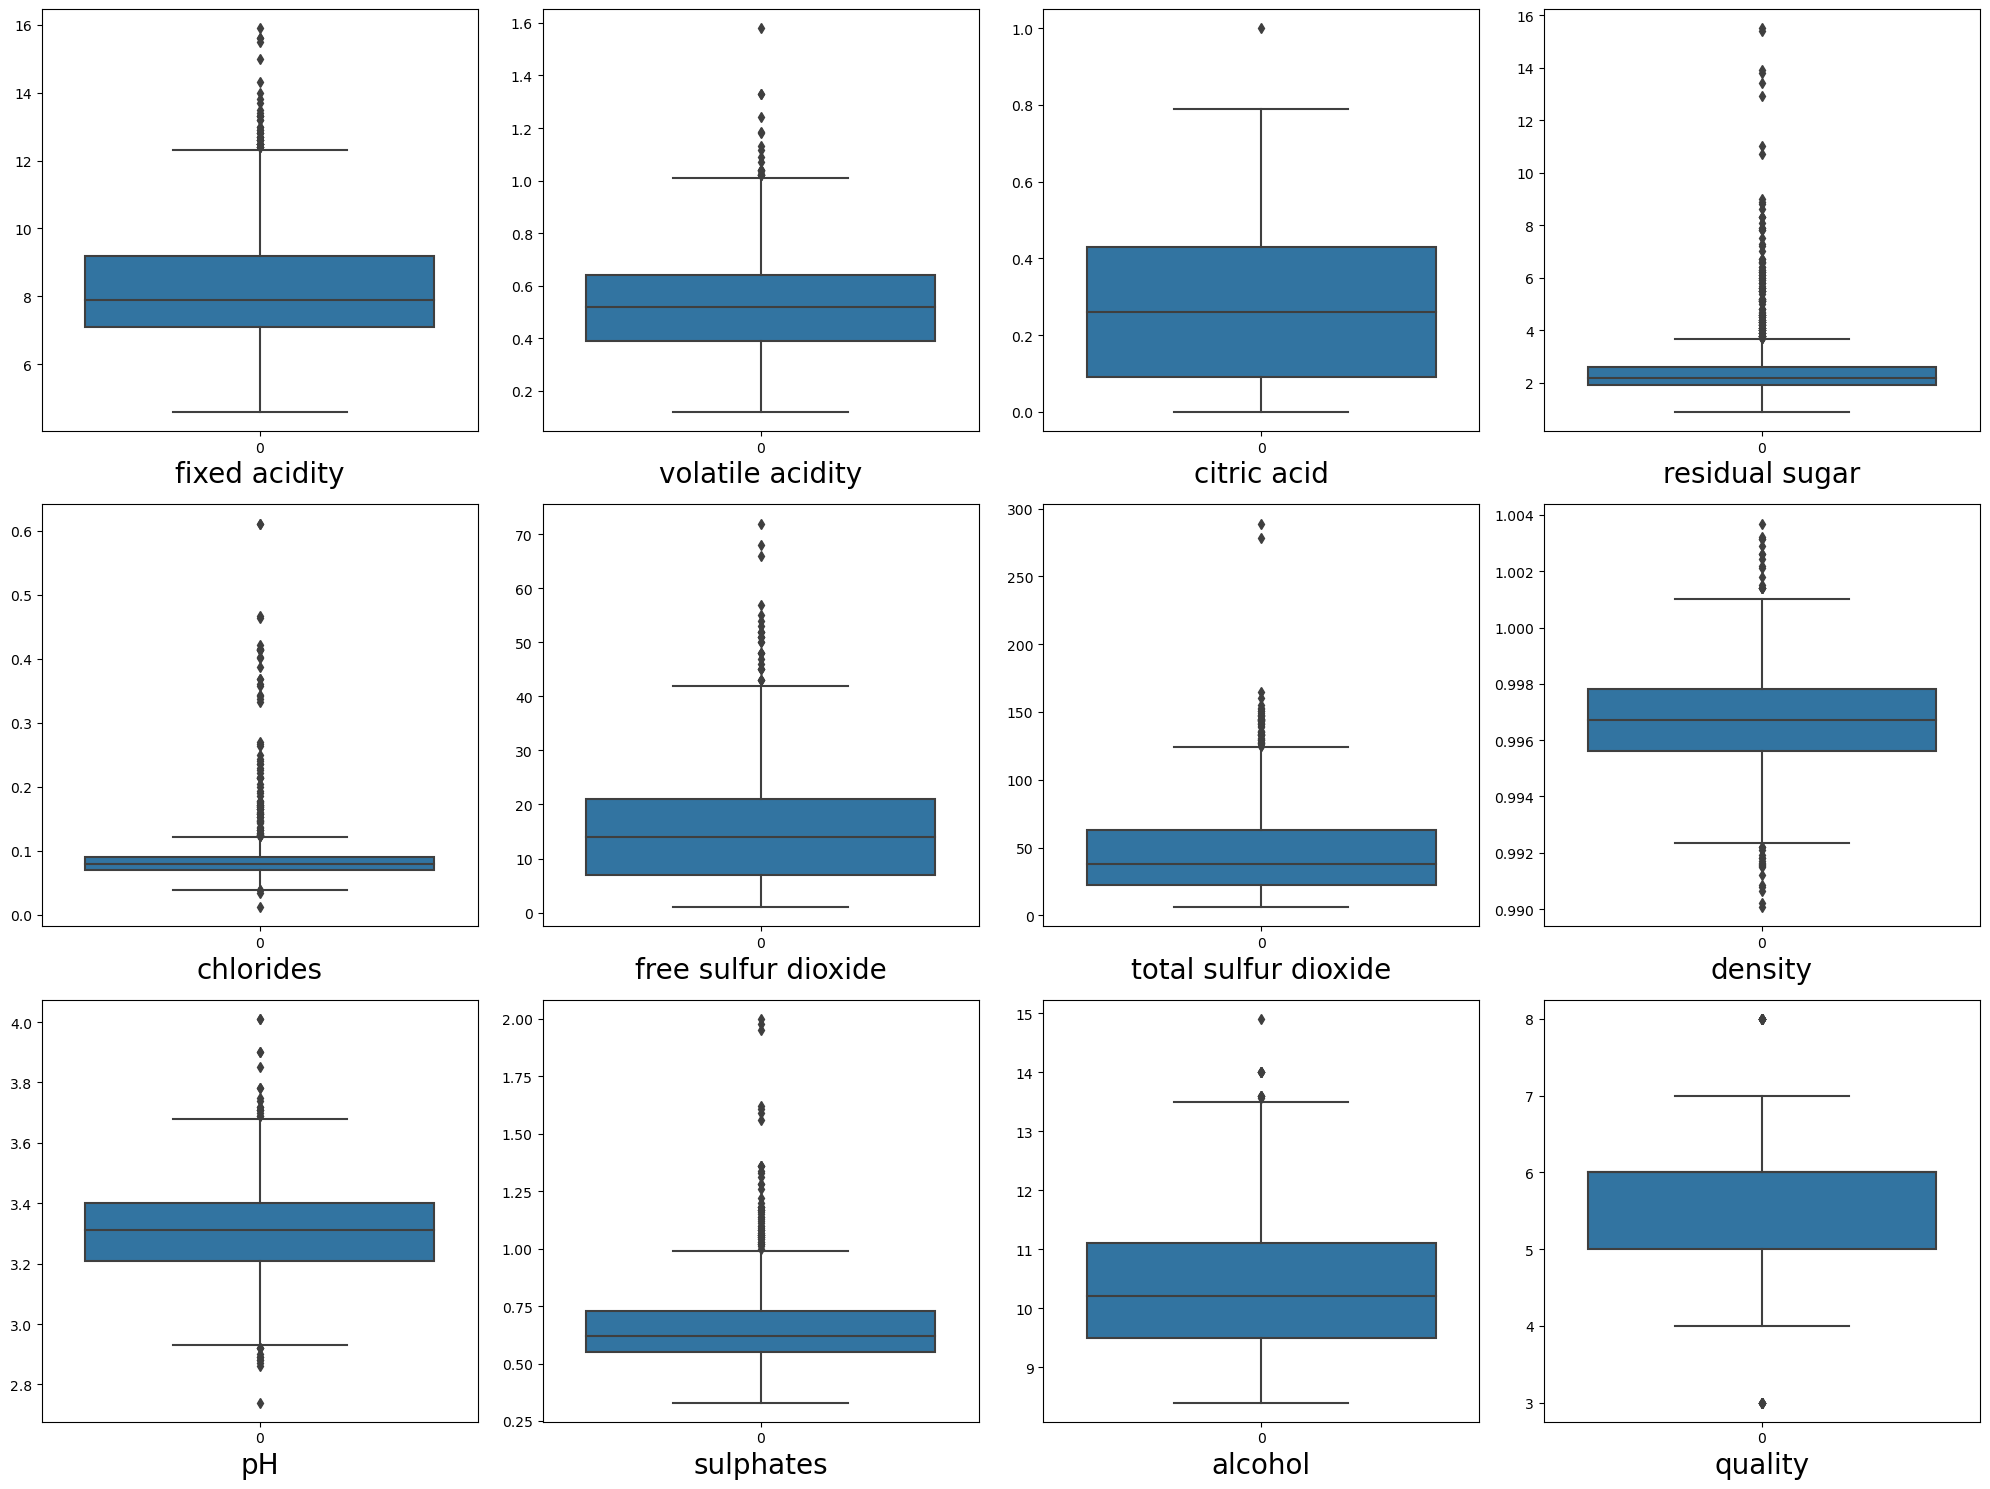

In [24]:
plt.figure(figsize=(20,15))
graph=1
for column in df:
    if graph<13:
        ax=plt.subplot(3,4,graph)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        graph +=1
        plt.tight_layout()


In [25]:
from scipy.stats import zscore
out_features=df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
z=np.abs(zscore(out_features))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.524431,0.932000,1.393258,0.461157,0.245623,0.468554,0.384050,0.584003,1.291872,0.578561,0.954374
1,0.294063,1.915800,1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,0.708395,0.124822,0.584575
2,0.294063,1.259934,1.188617,0.165259,0.078535,0.085537,0.214813,0.155790,0.321247,0.051024,0.584575
3,1.664067,1.363534,1.471711,0.461157,0.265883,0.105971,0.394471,0.691057,0.966495,0.461331,0.584575
5,0.524431,0.713378,1.393258,0.535132,0.265883,0.277045,0.204391,0.584003,1.291872,0.578561,0.954374
...,...,...,...,...,...,...,...,...,...,...,...
1593,0.869983,0.494756,0.983977,0.461157,0.407702,1.159265,0.264277,0.106490,0.711149,0.945435,0.861924
1594,1.215536,0.385444,0.983977,0.387183,0.038015,1.542281,0.084619,0.968269,0.904724,0.461331,0.062574
1595,1.388312,0.112167,0.881656,0.239233,0.529261,2.212559,0.124983,0.850510,1.356397,0.593744,0.709723
1597,1.388312,0.631395,0.779336,0.387183,0.265883,1.542281,0.084619,0.663167,1.679021,0.300667,0.214775


In [26]:
#thresold=3
np.where(z>3)

(array([  11,   12,   13,   13,   15,   15,   17,   30,   35,   38,   39,
          41,   53,   75,   75,   77,   80,   82,   85,   87,   96,   96,
          99,  114,  115,  127,  135,  135,  135,  135,  144,  145,  150,
         150,  159,  176,  202,  202,  211,  214,  226,  226,  241,  245,
         252,  282,  295,  296,  302,  309,  328,  334,  346,  346,  361,
         363,  385,  385,  393,  408,  420,  420,  433,  448,  473,  483,
         483,  485,  485,  492,  506,  510,  513,  516,  528,  534,  555,
         562,  562,  564,  565,  565,  565,  582,  582,  592,  597,  599,
         602,  626,  627,  632,  652,  671,  672,  687,  710,  722,  764,
         764,  781,  786,  791,  792,  838,  866,  888,  895,  895,  912,
         918,  918,  920,  920,  945,  948,  963,  985,  994, 1003, 1013,
        1049, 1052, 1060, 1060, 1060, 1073, 1081, 1081, 1082, 1082, 1103,
        1106, 1107, 1117, 1121, 1123, 1123, 1125, 1151, 1159, 1162, 1165,
        1216, 1216, 1216, 1250, 1250, 

In [27]:
z.iloc[11,2]

0.09038671661115057

In [28]:
df2=df[(z<3).all(axis=1)]
df2.shape

(1239, 12)

By visualizing the box plot there are many outliers are present in our dataset

Except citric acid almost all columns contains lot of outlier
So we have to handle it too

In [29]:
df1=df[(z<3).all(axis=1)]
df1.shape

(1239, 12)

In [30]:
print("old df",df.shape)
print("new df",df1.shape)

old df (1359, 12)
new df (1239, 12)


In [31]:
print("Data loss percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage- 8.830022075055188


In [32]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


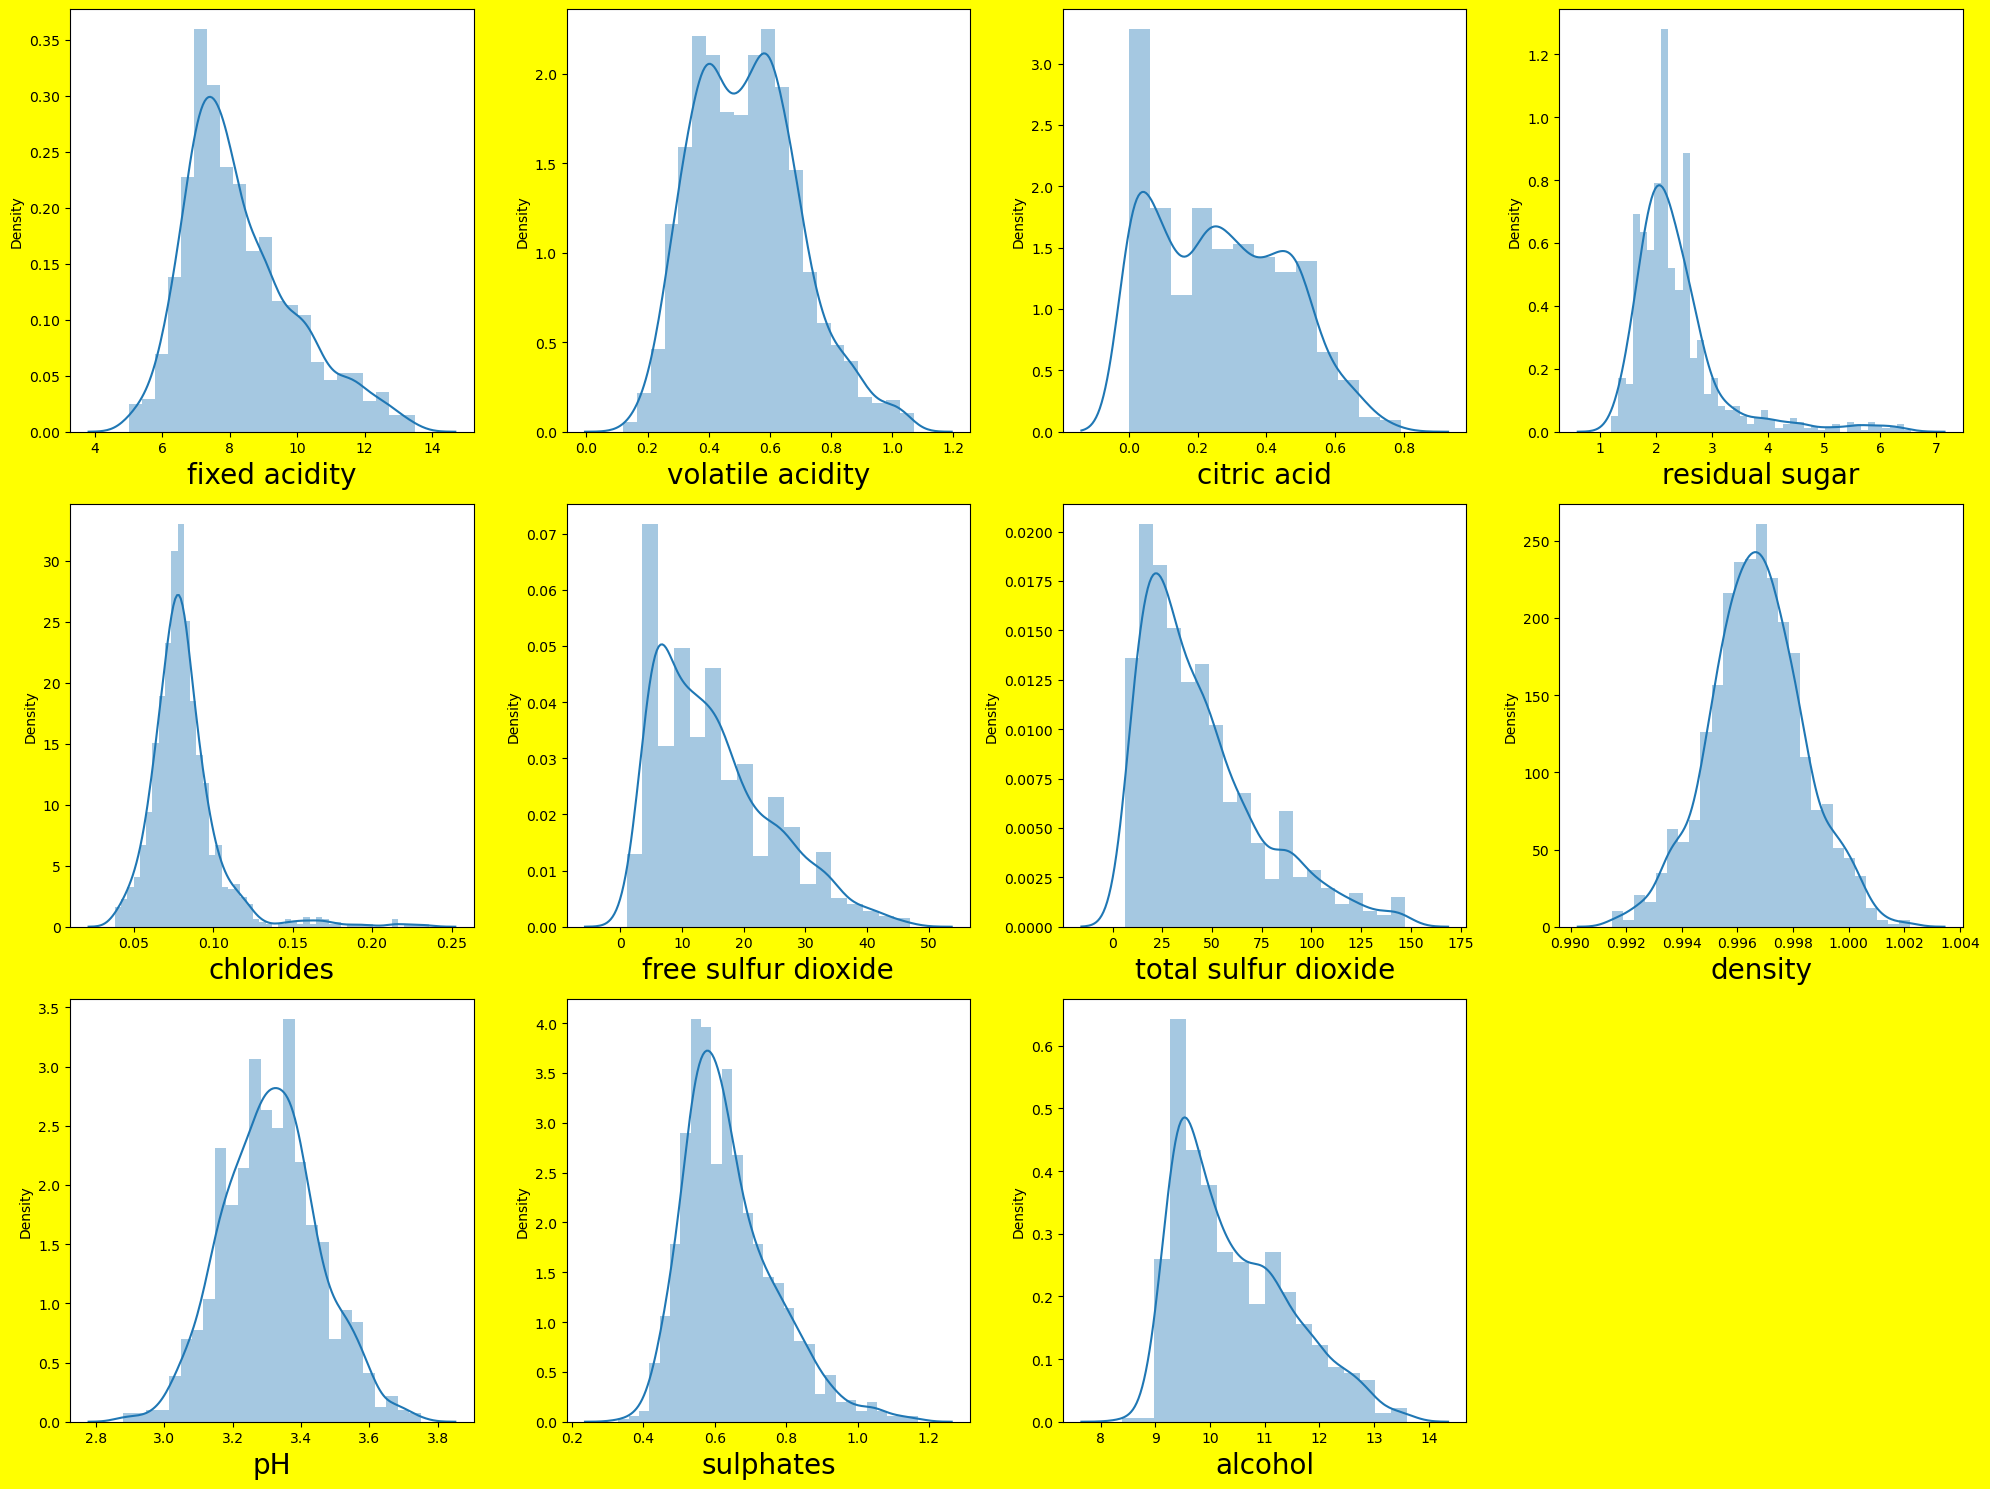

In [33]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in df1:
    if plotnumber<12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
        plotnumber +=1
        plt.tight_layout()

By observing the above distribution plot all data is normally distributed except residual sugar and chlorides

# Checking for skewness

In [34]:
df1.skew()

fixed acidity           0.803687
volatile acidity        0.443794
citric acid             0.277957
residual sugar          2.371572
chlorides               2.480193
free sulfur dioxide     0.867795
total sulfur dioxide    1.165286
density                 0.018132
pH                      0.116731
sulphates               0.952455
alcohol                 0.765872
quality                 0.229533
dtype: float64

In [35]:
df1['residual sugar']=np.cbrt(df1['residual sugar'])
df1['chlorides']=np.cbrt(df1['chlorides'])
df1['total sulfur dioxide']=np.cbrt(df1['total sulfur dioxide'])

In [36]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.238562,0.423582,11.0,3.239612,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,1.375069,0.461044,25.0,4.061548,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,1.320006,0.451436,15.0,3.779763,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.238562,0.421716,17.0,3.914868,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.216440,0.421716,13.0,3.419952,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.238562,0.408166,28.0,3.361975,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,1.259921,0.448140,32.0,3.530348,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,1.300591,0.395789,39.0,3.708430,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,1.259921,0.421716,32.0,3.530348,0.99547,3.57,0.71,10.2,5


In [37]:
df1.skew()

fixed acidity           0.803687
volatile acidity        0.443794
citric acid             0.277957
residual sugar          1.530428
chlorides               1.192574
free sulfur dioxide     0.867795
total sulfur dioxide    0.334160
density                 0.018132
pH                      0.116731
sulphates               0.952455
alcohol                 0.765872
quality                 0.229533
dtype: float64

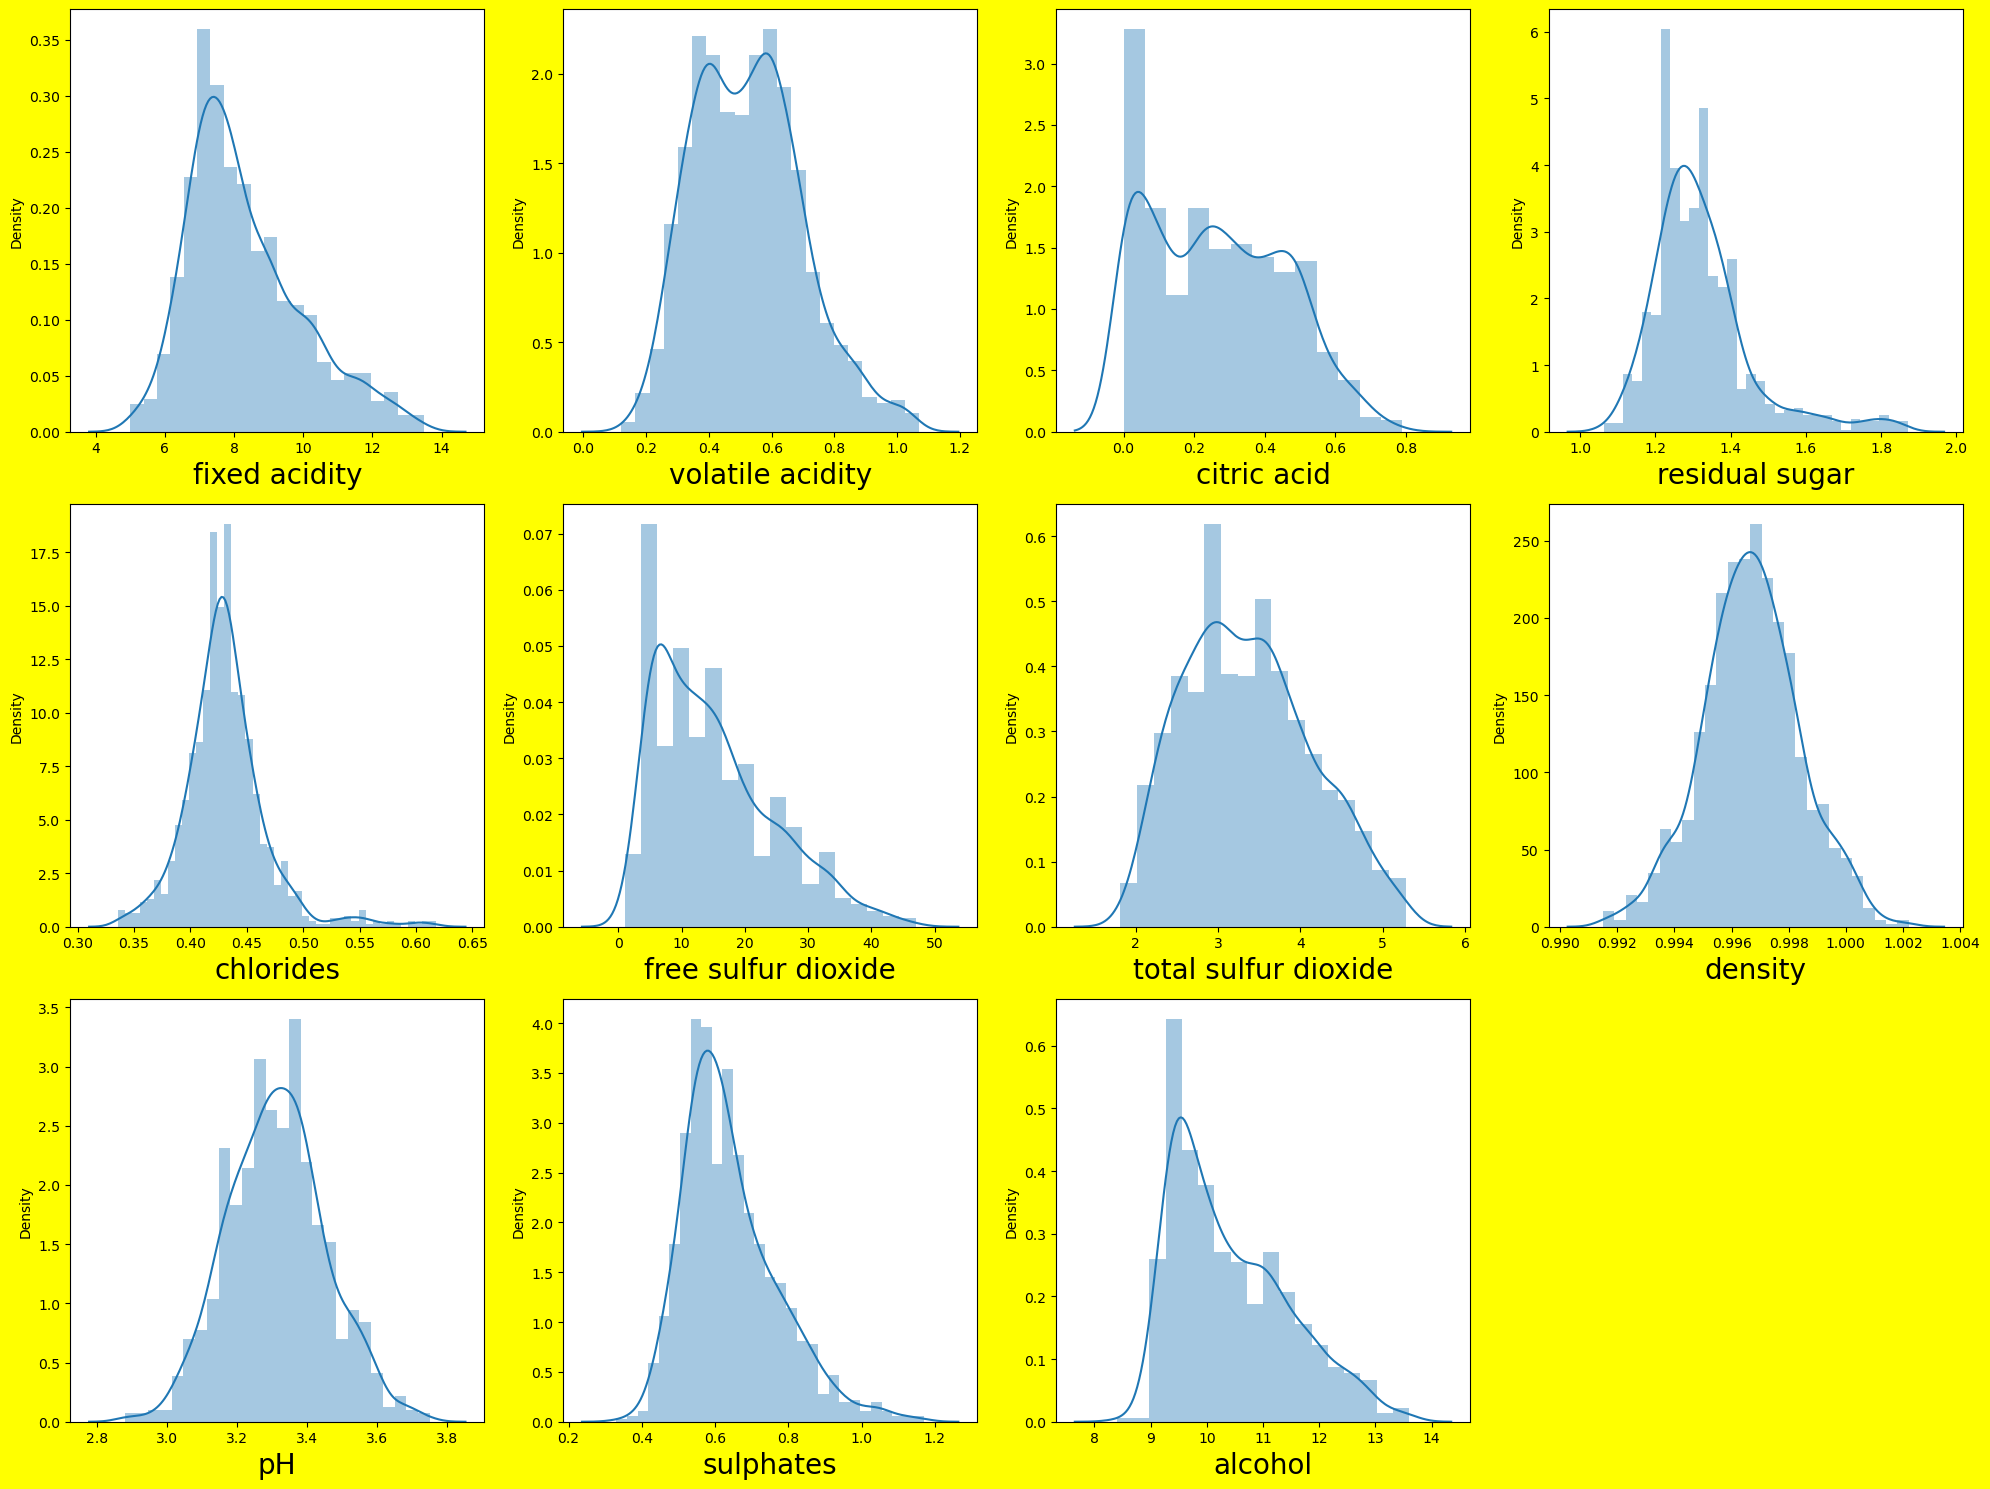

In [38]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in df1:
    if plotnumber<12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
        plotnumber +=1
        plt.tight_layout()

# Plotting Heatmap(correlation)

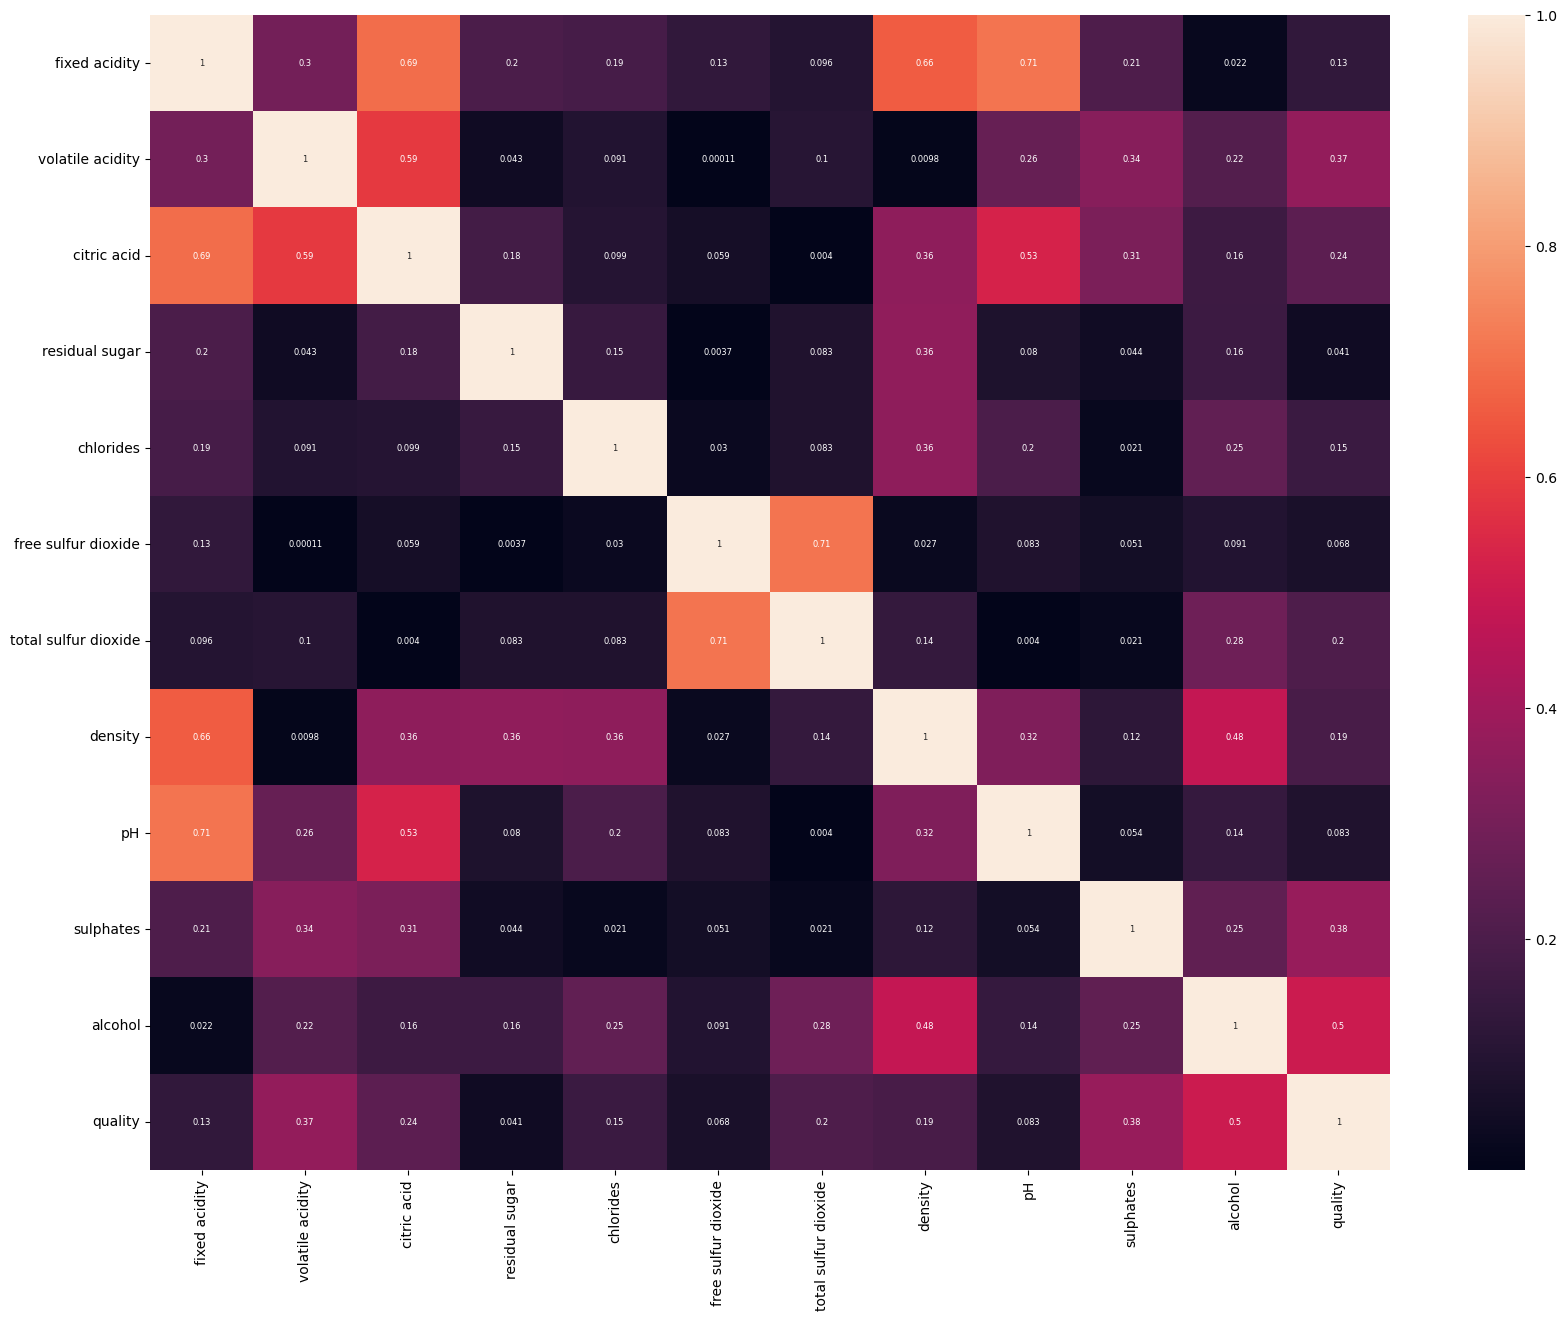

In [39]:
df1_corr=df1.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(df1_corr,annot=True,annot_kws={'size':6})
plt.show()

We can see that No pair of columns is highly correlated with other

By seeing Corr with target attribute

Alcohol, Sulphates, Volatile acidity have the highest correlations among all other feature

In [40]:
df1=df.drop('total sulfur dioxide',axis=1)

In [41]:
df1['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [42]:
df1.isnull().sum()

fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

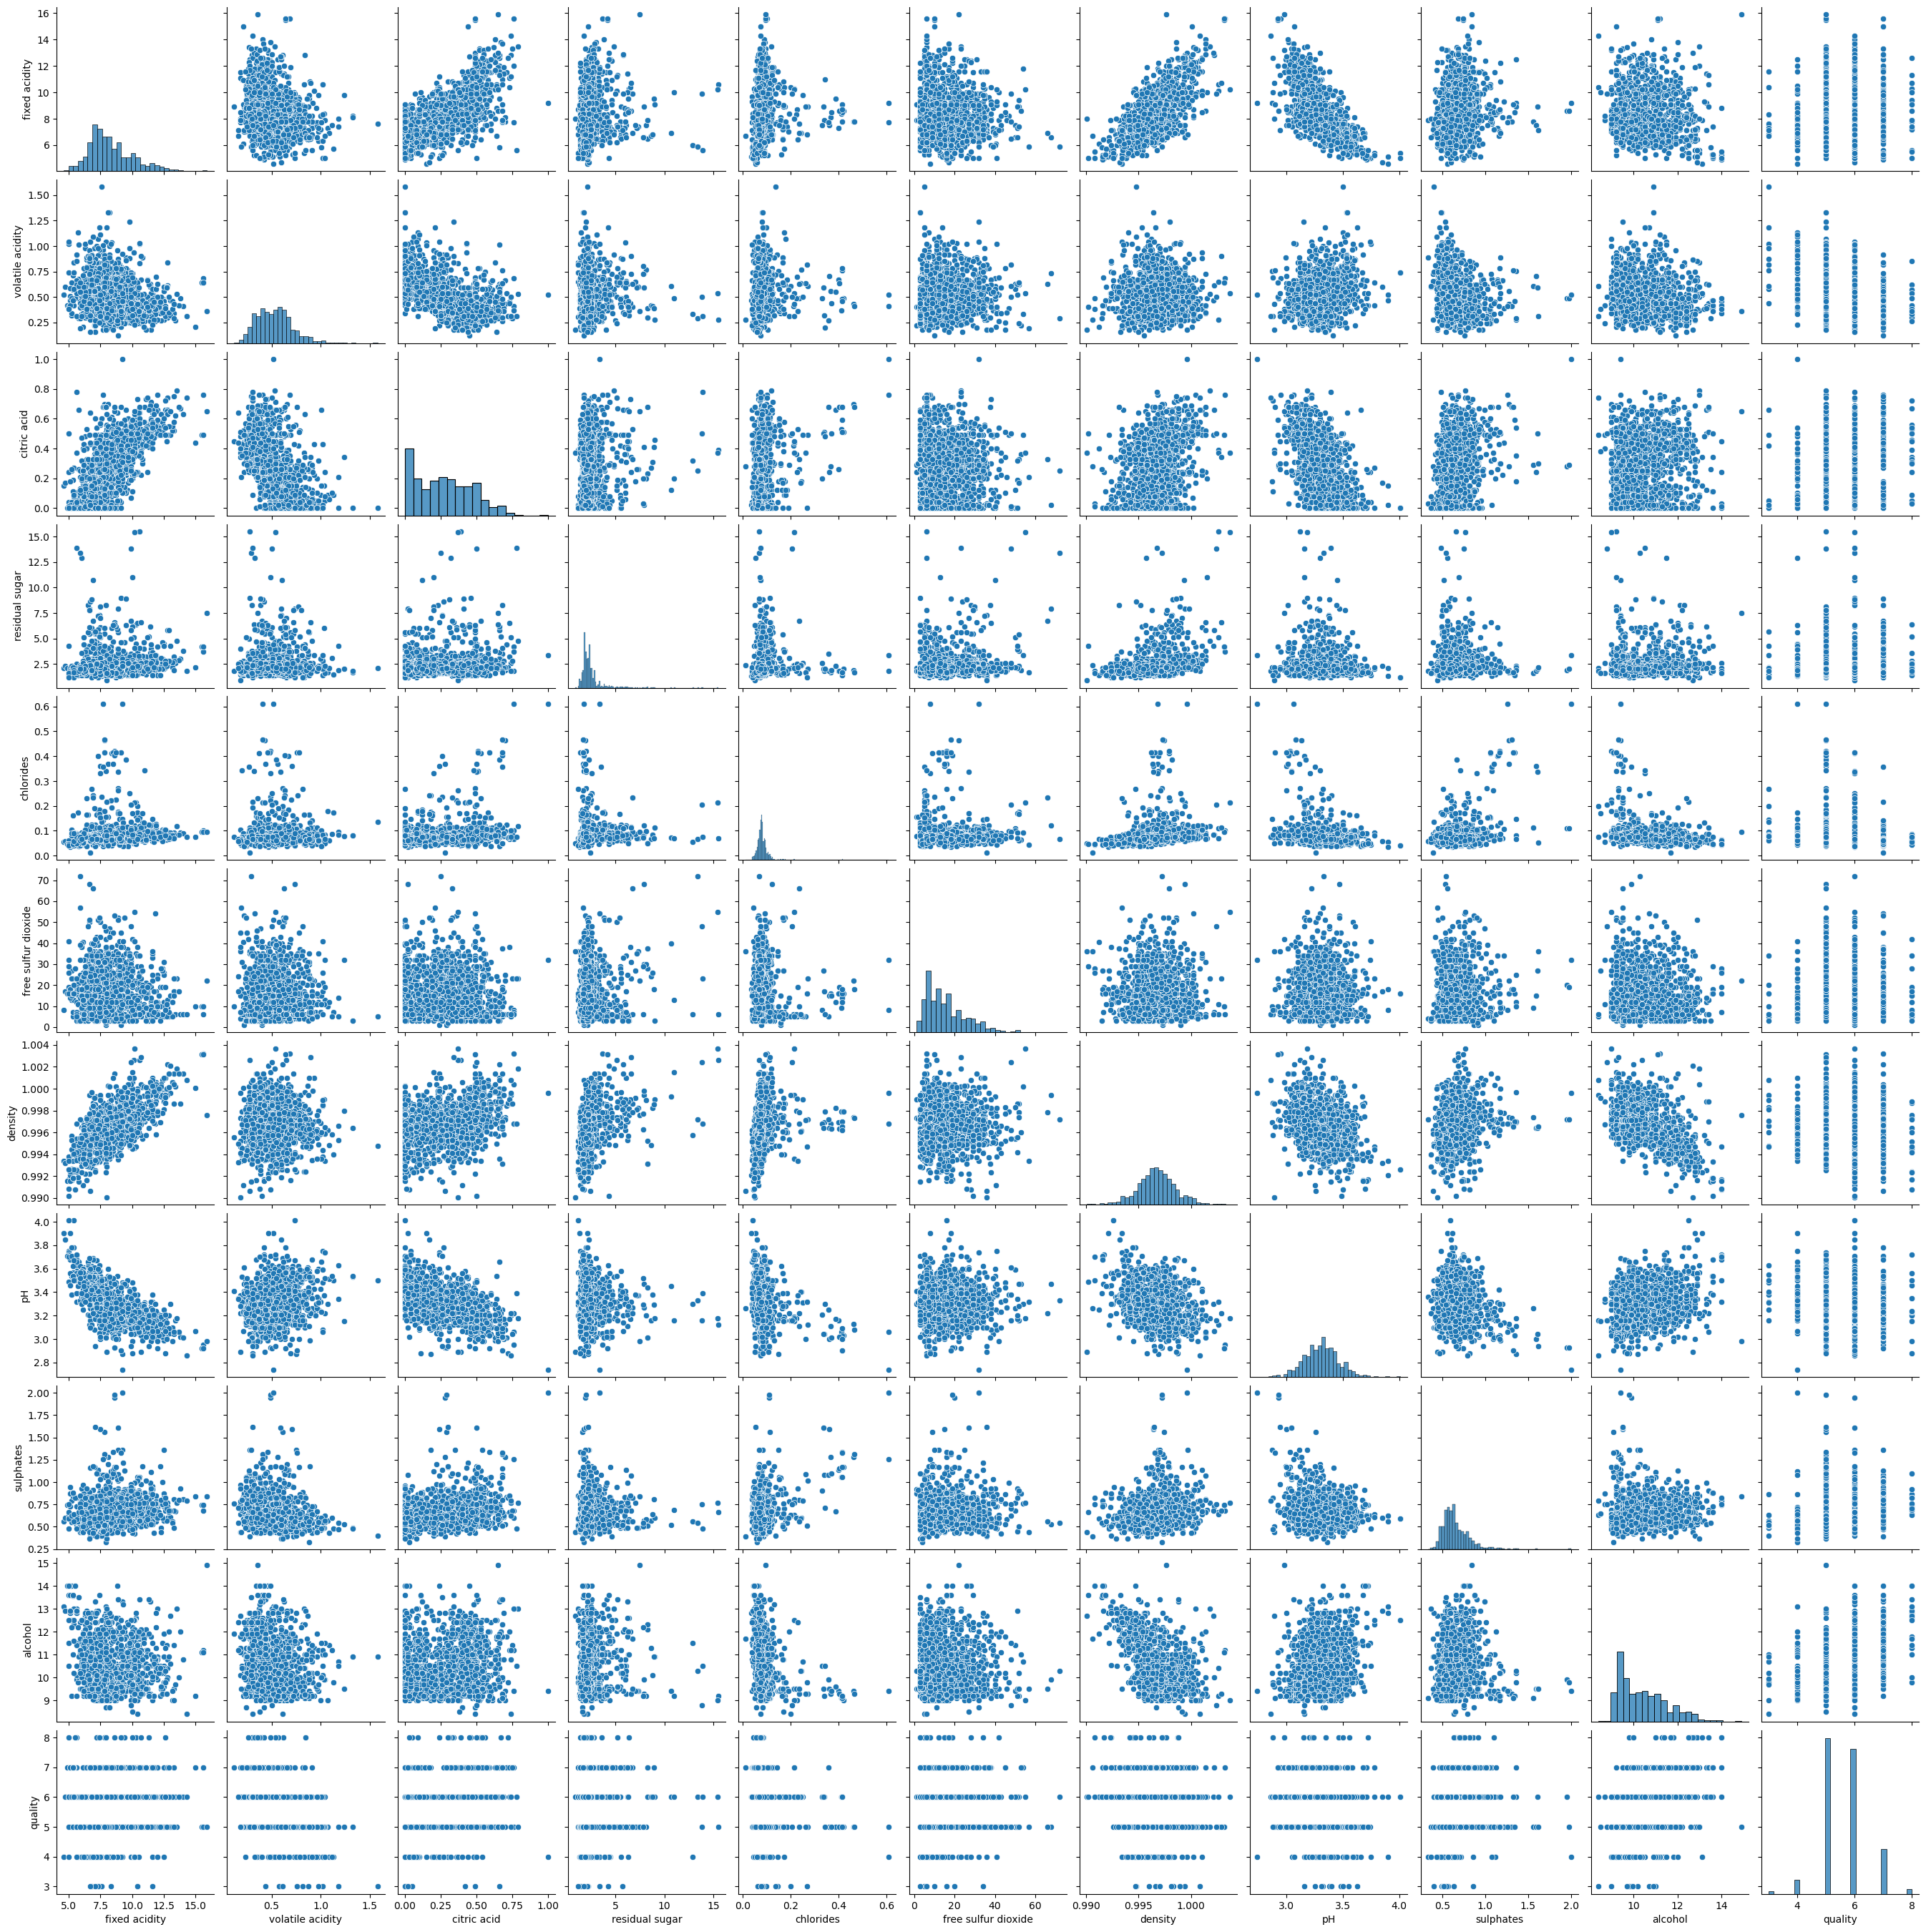

In [43]:
sns.pairplot(data=df1,palette="Dark2")
plt.show()

In [44]:
df1['goodquality'] = [1 if x >= 7 else 0 for x in df1['quality']]# Separate feature variables and target variable
x= df1.drop(['quality','goodquality'], axis = 1)
y = df1['goodquality']

In [45]:
df1['goodquality'].value_counts()

goodquality
0    1175
1     184
Name: count, dtype: int64

In [46]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2


# Feature selection

# Seperating independent variables

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,-0.524431,0.932000,-1.393258,-0.461157,-0.245623,-0.468554,0.584003,1.291872,-0.578561,-0.954374
1,-0.294063,1.915800,-1.393258,0.056665,0.200094,0.872003,0.048737,-0.708395,0.124822,-0.584575
2,-0.294063,1.259934,-1.188617,-0.165259,0.078535,-0.085537,0.155790,-0.321247,-0.051024,-0.584575
3,1.664067,-1.363534,1.471711,-0.461157,-0.265883,0.105971,0.691057,-0.966495,-0.461331,-0.584575
4,-0.524431,0.713378,-1.393258,-0.535132,-0.265883,-0.277045,0.584003,1.291872,-0.578561,-0.954374
...,...,...,...,...,...,...,...,...,...,...
1354,-0.869983,0.494756,-0.983977,-0.461157,-0.407702,1.159265,-0.106490,0.711149,0.945435,-0.861924
1355,-1.215536,0.385444,-0.983977,-0.387183,0.038015,1.542281,-0.968269,0.904724,-0.461331,0.062574
1356,-1.388312,0.112167,-0.881656,-0.239233,-0.529261,2.212559,-0.850510,1.356397,0.593744,0.709723
1357,-1.388312,0.631395,-0.779336,-0.387183,-0.265883,1.542281,-0.663167,1.679021,0.300667,-0.214775


# Variance inflation factor

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,VIF values,features
0,7.453876,fixed acidity
1,1.691068,volatile acidity
2,2.894468,citric acid
3,1.635992,residual sugar
4,1.500069,chlorides
5,1.088449,free sulfur dioxide
6,6.244935,density
7,3.265497,pH
8,1.466172,sulphates
9,3.116840,alcohol


there is no multicolinearity By checking the vif values 

Finding the best RandomState

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print("Best accuracy is",maxAccu,"at random state",maxRS)

Best accuracy is 0.8872549019607843 at random state 1
Best accuracy is 0.8995098039215687 at random state 3
Best accuracy is 0.9093137254901961 at random state 21
Best accuracy is 0.9117647058823529 at random state 27


# classification Algorithms

In [50]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

Checking for RandomForestClassifier

In [51]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8700980392156863
[[338  11]
 [ 42  17]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       349
           1       0.61      0.29      0.39        59

    accuracy                           0.87       408
   macro avg       0.75      0.63      0.66       408
weighted avg       0.85      0.87      0.85       408



The accuracy score of RandomForestClassifier is 86%

# ExtraTreesClassifier

In [52]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8602941176470589
[[338  11]
 [ 46  13]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       349
           1       0.54      0.22      0.31        59

    accuracy                           0.86       408
   macro avg       0.71      0.59      0.62       408
weighted avg       0.83      0.86      0.83       408



# logisticRegression

In [53]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8627450980392157
[[331  18]
 [ 38  21]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       349
           1       0.54      0.36      0.43        59

    accuracy                           0.86       408
   macro avg       0.72      0.65      0.68       408
weighted avg       0.85      0.86      0.85       408



# SVC

In [54]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8651960784313726
[[334  15]
 [ 40  19]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       349
           1       0.56      0.32      0.41        59

    accuracy                           0.87       408
   macro avg       0.73      0.64      0.67       408
weighted avg       0.84      0.87      0.85       408



# AdaBoost

In [55]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
print(accuracy_score(y_test,predada))
print(confusion_matrix(y_test,predada))
print(classification_report(y_test,predada))

0.8529411764705882
[[325  24]
 [ 36  23]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       349
           1       0.49      0.39      0.43        59

    accuracy                           0.85       408
   macro avg       0.69      0.66      0.67       408
weighted avg       0.84      0.85      0.85       408



In [56]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8651960784313726
[[332  17]
 [ 38  21]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       349
           1       0.55      0.36      0.43        59

    accuracy                           0.87       408
   macro avg       0.72      0.65      0.68       408
weighted avg       0.85      0.87      0.85       408



# Cross Validation

In [57]:
#cross validation of Random Forest
score=cross_val_score(RFC,x,y)
print("score")
print(score.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predRFC)-score.mean())

score
0.8697606902539613
Diff between acc_score and cross validation- 0.0003373489617249925


In [58]:
score=cross_val_score(ET,x,y)
print("score")
print(score.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predET)-score.mean())

score
0.8646190579552855
Diff between acc_score and cross validation- -0.00432494030822661


In [59]:
score=cross_val_score(LR,x,y)
print("score")
print(score.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predLR)-score.mean())

score
0.8675738007380074
Diff between acc_score and cross validation- -0.004828702698791654


In [60]:
score=cross_val_score(svc,x,y)
print("score")
print(score.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predsvc)-score.mean())

score
0.8668222270457999
Diff between acc_score and cross validation- -0.0016261486144273363


In [61]:
score=cross_val_score(ada,x,y)
print("score")
print(score.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predada)-score.mean())

score
0.851375624050358
Diff between acc_score and cross validation- 0.001565552420230154


In [62]:
score=cross_val_score(BC,x,y)
print("score")
print(score.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predBC)-score.mean())

score
0.8631349034078577
Diff between acc_score and cross validation- 0.002061175023514883


Randon Forest classifier is best modelas the difference between accuracy and crossvalidation is least

# Hyper parameter tuning

In [63]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','entropy'],
             'random_state':[10,50,1200],
             'max_depth':[10,15],
            'n_jobs':[-2,-1,1],
        
           'n_estimators':[50,100,200,300]}

In [64]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [65]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1200]})

In [66]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 1200}

In [67]:
Final_model=RandomForestClassifier(criterion='gini',max_depth=15,n_estimators=300,n_jobs=-2,random_state=1200)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

86.02941176470588


Lets check auc for best model hyper parameter tuning

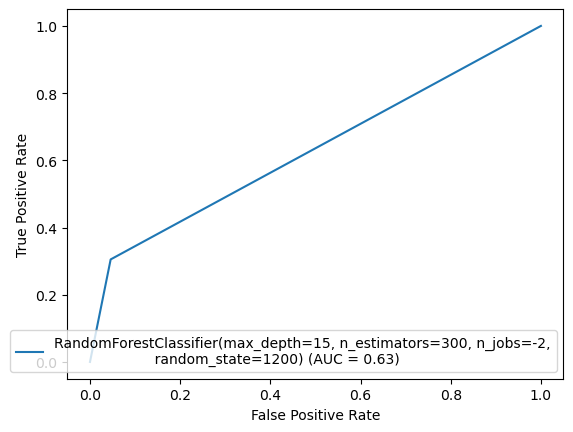

In [71]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

Saving the model using .pkl

In [72]:
import joblib
joblib.dump(Final_model,"Red Wine Quality prediction.pkl")

['Red Wine Quality prediction.pkl']

# Predicting the saved model

In [73]:
model=joblib.load("Red Wine Quality prediction.pkl")
prediction=model.predict(x_test)

In [74]:
a=np.array(y_test)
df=pd.DataFrame()
df["prediction"]=prediction
df["original"]=a
df

,prediction,original
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
403,0,0
404,0,0
405,1,0
406,0,0
